<img src=https://audiovisuales.icesi.edu.co/assets/custom/images/ICESI_logo_prin_descriptor_RGB_POSITIVO_0924.jpg width=200>

*Milton Orlando Sarria Paja, PhD.*

----

# **Optimizando la Conversión en E-commerce**

Vamos a entender cómo los conceptos teóricos abordados en el curso se integran para resolver un problema de negocio real de principio a fin, desde la predicción de un valor hasta la clasificación de un cliente y la selección del mejor modelo.

#### **Del Concepto al Código: Por Qué la Teoría es tu GPS**



* **¿Regresión Lineal o Logística?** La teoría te dice que depende de si tu objetivo es predecir un *valor* (cuánto interés tiene un cliente) o una *acción* (¿comprará o no?).
  
  
* **¿Por qué Regularización (L1/L2)?** La teoría nos advierte del *overfitting*. Con 17 características sobre el comportamiento de un usuario, ¿cómo te aseguras de que tu modelo no está simplemente memorizando sesiones pasadas en lugar de encontrar patrones reales?

  
* **¿Accuracy es suficiente?** La teoría de métricas nos obliga a preguntar: ¿Qué es más costoso para el negocio, ignorar a un comprador potencial (Falso Negativo) o hacerle una oferta a alguien que solo estaba mirando (Falso Positivo)?

  

"Hoy no solo escribirán código. Tomarán **decisiones de modelado** y las justificarán con los conceptos que ya conocen. Empecemos."

---

## **El Problema: Reducir el Abandono de Carritos de Compra**

**Planteamiento del Caso:**
ShopSphere, un e-commerce en crecimiento, enfrenta un reto clave: aunque recibe un alto tráfico y los usuarios muestran interés en sus productos, las tasas de conversión siguen siendo bajas. Como consultor de Inteligencia Artificial, tu misión es **proponer y desarrollar una estrategia basada en Machine Learning** que permita identificar a los usuarios con mayor probabilidad de compra y activar intervenciones personalizadas en tiempo real (ej. descuentos selectivos), con el fin de **incrementar la conversión y maximizar el valor de cada visita**.


**El Dataset:** [Online Shoppers Purchasing Intention Dataset de UCI](https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset). Contiene métricas de sesión de más de 12,000 usuarios, incluyendo el tipo de páginas que visitaron, el día del mes, el tipo de visitante, y si la sesión terminó en una compra.

**Nuestra Misión se divide en dos partes:**
1.  **Mini-Desafío de Regresión:** Predecir el "valor de la sesión" para medir el interés del usuario.
2.  **Mini-Desafío de Clasificación:** Predecir si el usuario finalmente realizará una compra.


### **Manos a la Obra - El Flujo de Trabajo**

-----

### Análisis Exploratorio de Intención de Compra en E-commerce

**Objetivo:** Entender la estructura, distribuciones y relaciones presentes en el dataset para formular hipótesis sobre qué comportamientos de los usuarios influyen en la decisión de compra.

-----

#### **1. Configuración e Importación de Datos**

Primero, importamos las librerías necesarias y cargamos el dataset.


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# Establecemos un estilo visual para los gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
df = pd.read_csv("data/online_shoppers_intention.csv")
df.head(3)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False


### **Variables numéricas:**

1. **Administrative**
   Número de páginas administrativas visitadas en la sesión (ej. páginas de cuenta, registro, inicio de sesión).

2. **Administrative Duration**
   Tiempo total (en segundos) que el usuario pasó en páginas administrativas.

3. **Informational**
   Número de páginas informativas visitadas (ej. páginas de ayuda, preguntas frecuentes).

4. **Informational Duration**
   Tiempo total en páginas informativas.

5. **Product Related**
   Número de páginas relacionadas con productos visitadas (ej. páginas de catálogos o fichas de producto).

6. **Product Related Duration**
   Tiempo total en páginas relacionadas con productos.

7. **Bounce Rate**
   Porcentaje de sesiones en las que el usuario entra a una página y abandona sin interactuar más (métrica de Google Analytics).

8. **Exit Rate**
   Porcentaje de veces que una página fue la última visitada de la sesión (métrica de Google Analytics).

9. **Page Value**
   Valor promedio de una página visitada antes de completar una transacción (según Google Analytics).

10. **Special Day**
    Indica qué tan cercana está la visita a una fecha especial (ej. Día de la Madre, San Valentín). Toma valores entre 0 y 1, donde 1 representa la máxima cercanía.

---

### **Variables categóricas:**

11. **OperatingSystems**
    Sistema operativo usado por el visitante (ej. Windows, MacOS, Linux).

12. **Browser**
    Navegador utilizado (ej. Chrome, Firefox, Safari).

13. **Region**
    Región geográfica desde la cual el visitante accedió al sitio.

14. **TrafficType**
    Fuente o tipo de tráfico (ej. directo, buscador, campaña).

15. **VisitorType**
    Tipo de visitante: *Returning Visitor* (recurrente) o *New Visitor* (nuevo).

16. **Weekend**
    Valor booleano que indica si la visita ocurrió en fin de semana.

17. **Month**
    Mes en el que ocurrió la visita (ej. Jan, Feb, Mar).

18. **Revenue** (variable objetivo / clase)
    Variable booleana que indica si la sesión terminó en compra (**True**) o no (**False**).


-----

#### **2. Inspección Inicial del Dataset**

El primer paso es siempre tener una idea general de cómo se ven nuestros datos.


In [55]:
print("\n--- Información General (Tipos de Datos y Nulos) ---")
df.info()

print("\n--- Estadísticas Descriptivas (Columnas Numéricas) ---")
print(df.describe())


--- Información General (Tipos de Datos y Nulos) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                

##### **Pregunta 1 🧠**

**Pregunta:** Al observar el resultado de `df.info()`, notamos que columnas como `Month` y `VisitorType` son de tipo `object`. ¿Por qué un modelo de machine learning como la Regresión Logística no podría usar estos datos directamente y qué paso de preprocesamiento es necesario?



R: 

-----

#### **3. Análisis de la Variable Objetivo (`Revenue`)**

Nuestra variable objetivo es `Revenue`, que indica si la sesión terminó en una compra (`True`) o no (`False`).

Revenue se traduce como ingresos.
En contabilidad y negocios, significa el dinero total que una empresa recibe por la venta de bienes o servicios antes de restar gastos, impuestos u otros costos. Es distinto de la ganancia, que resulta después de deducir esos costos.


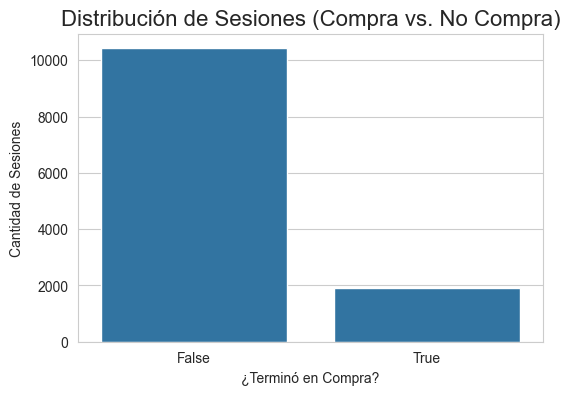

Porcentaje de sesiones sin compra (False): 84.53%
Porcentaje de sesiones con compra (True): 15.47%


In [56]:
# Visualizamos la distribución de la variable objetivo
plt.figure(figsize=(6, 4))
sns.countplot(x='Revenue', data=df)
plt.title('Distribución de Sesiones (Compra vs. No Compra)', fontsize=16)
plt.xlabel('¿Terminó en Compra?')
plt.ylabel('Cantidad de Sesiones')
plt.show()

# Calculamos el porcentaje exacto
revenue_counts = df['Revenue'].value_counts(normalize=True) * 100
print(f"Porcentaje de sesiones sin compra (False): {revenue_counts[False]:.2f}%")
print(f"Porcentaje de sesiones con compra (True): {revenue_counts[True]:.2f}%")



##### **Pregunta 2 🧠**

**Pregunta:** El gráfico confirma que el dataset está **desbalanceado**. Si entrenáramos un modelo y obtuviéramos una **exactitud (accuracy) del 85%**, ¿deberíamos considerar que el modelo es bueno? ¿Por qué sí o por qué no?




#### **4. Análisis de Variables Numéricas y Categóricas**

Ahora, exploremos las características para entender el comportamiento del usuario.


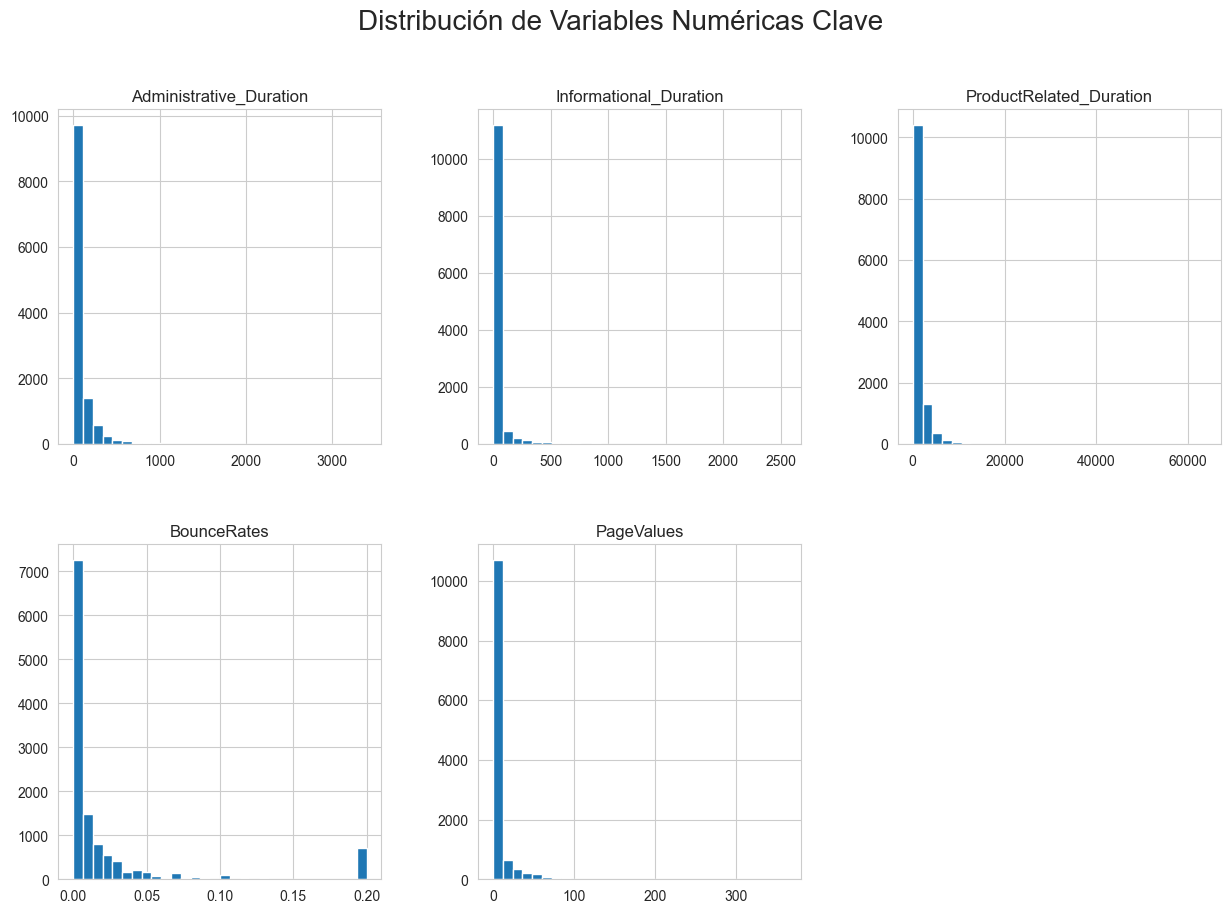

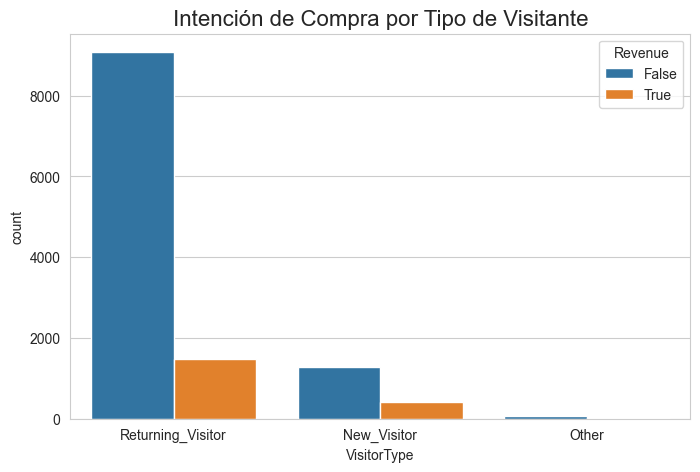

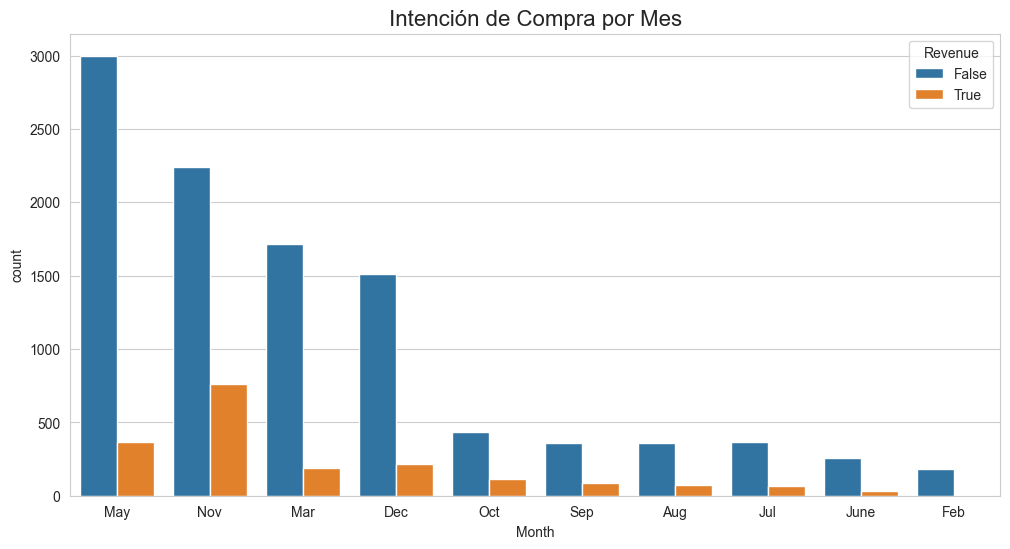

In [57]:
# Distribución de algunas variables numéricas clave
numerical_features = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'PageValues']
df[numerical_features].hist(bins=30, figsize=(15, 10), layout=(2, 3))
plt.suptitle('Distribución de Variables Numéricas Clave', fontsize=20)
plt.show()

# Relación del tipo de visitante con la compra
plt.figure(figsize=(8, 5))
sns.countplot(x='VisitorType', hue='Revenue', data=df)
plt.title('Intención de Compra por Tipo de Visitante', fontsize=16)
plt.show()

# Relación del mes con la compra
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', hue='Revenue', data=df, order=df['Month'].value_counts().index)
plt.title('Intención de Compra por Mes', fontsize=16)
plt.show()

##### **Pregunta 3 🧠**

**Pregunta:** La distribución de las variables de duración (ej. `ProductRelated_Duration`) está fuertemente **sesgada a la derecha**. ¿Qué nos dice esto sobre el comportamiento típico de la mayoría de los usuarios en el sitio web?



-----

#### **5. Análisis de Correlaciones y Relaciones Bivariadas**

Finalmente, busquemos relaciones entre las variables, especialmente con nuestra variable objetivo.


In [58]:
# Boxplot para ver la relación entre PageValues y Revenue


# Matriz de correlación para las variables numéricas
# Convertimos 'Revenue' y 'Weekend' a números (0/1) para incluirlos en la correlación

# Excluimos las columnas de texto para el cálculo


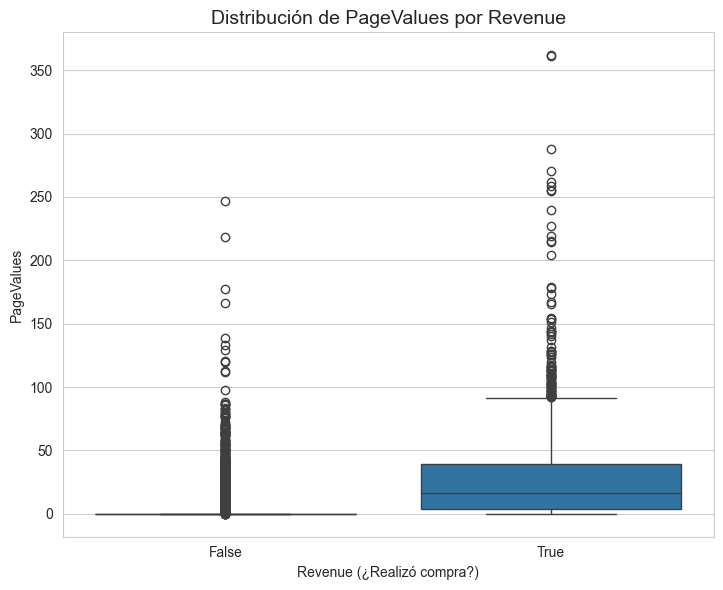

In [59]:
# Boxplot para las variables PageValues y Revenue
plt.figure(figsize=(14, 6))

# Subplot 1: Boxplot para PageValues por Revenue
plt.subplot(1, 2, 1)
sns.boxplot(x='Revenue', y='PageValues', data=df)
plt.title('Distribución de PageValues por Revenue', fontsize=14)
plt.xlabel('Revenue (¿Realizó compra?)')
plt.ylabel('PageValues')
plt.tight_layout()
plt.show()


In [60]:
# Primero, identificamos y seleccionamos solo las variables numéricas

df_corr = df.copy()

# Convertir variables booleanas a numéricas (0/1)
df_corr['Revenue'] = df_corr['Revenue'].astype(int)
df_corr['Weekend'] = df_corr['Weekend'].astype(int)


numeric_columns = df_corr.select_dtypes(include=[np.number]).columns.tolist()
print("Variables numéricas encontradas:")
print(numeric_columns)

# Creamos un dataframe solo con las variables numéricas
df_numeric = df_corr[numeric_columns]
print(f"\nDimensiones del dataframe numérico: {df_numeric.shape}")




Variables numéricas encontradas:
['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend', 'Revenue']

Dimensiones del dataframe numérico: (12330, 16)


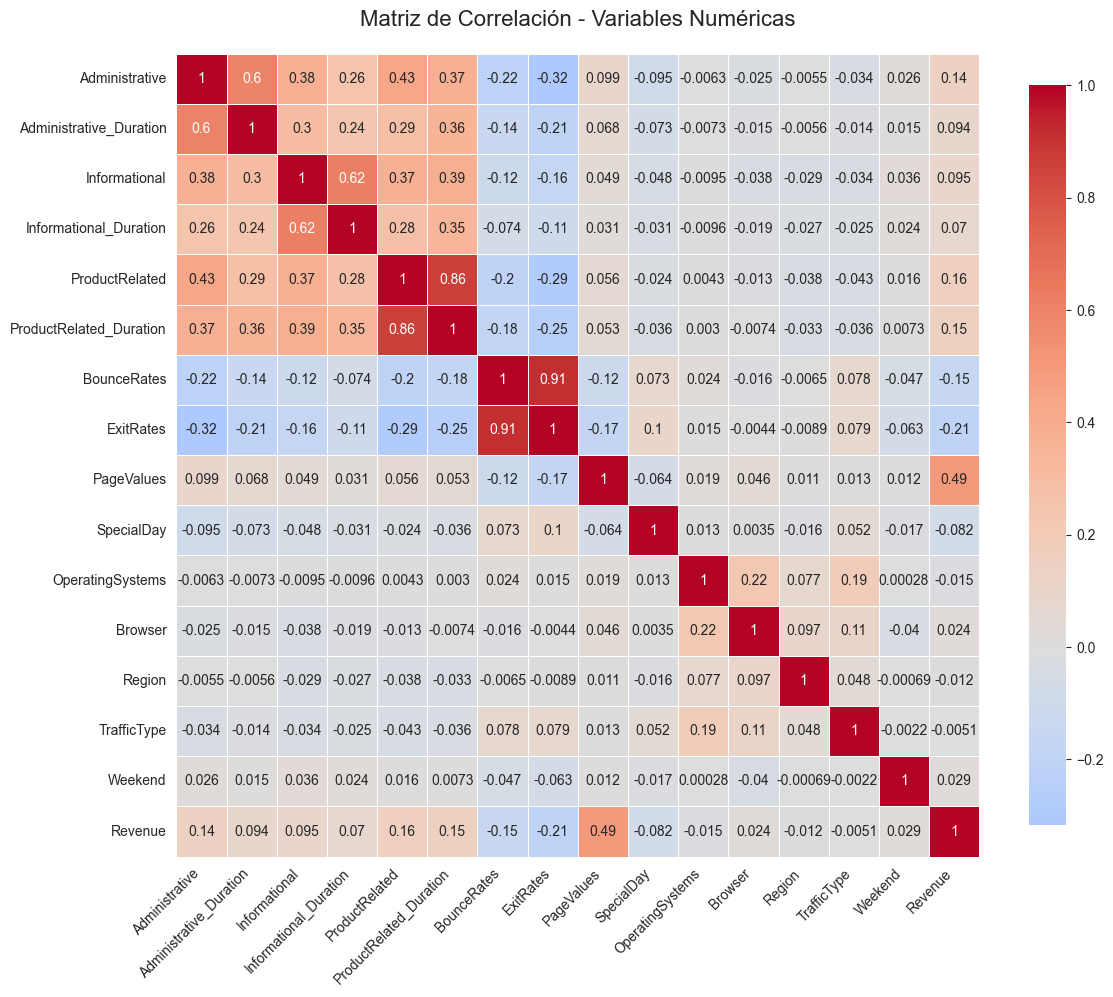

In [61]:
# Calculamos la matriz de correlación
correlation_matrix = df_numeric.corr()

# Visualizamos la matriz de correlación con un heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,
            annot=True,           # Mostrar los valores de correlación
            cmap='coolwarm',      # Esquema de colores
            center=0,             # Centrar en 0
            square=True,          # Hacer cuadrados las celdas
            linewidths=0.5,       # Líneas entre celdas
            cbar_kws={"shrink": .9})  # Ajustar la barra de color

plt.title('Matriz de Correlación - Variables Numéricas', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


##### **Pregunta Conceptual 4 🧠**

**Pregunta:** El boxplot muestra una diferencia muy marcada en la distribución de `PageValues` para las sesiones que terminaron en compra frente a las que no. Además, la matriz de correlación muestra que `PageValues` es la variable con la correlación positiva más alta con `Revenue`. ¿Por qué esta variable es, intuitivamente, un predictor tan fuerte?



### **Mini-Desafío de Regresión - Prediciendo el Valor de la Sesión (`PageValues`)**

**Objetivo:** Construir y comparar varios modelos de regresión para predecir la métrica `PageValues`, utilizando preprocesamiento, validación cruzada y ajuste de hiperparámetros para seleccionar el mejor modelo.

#### **Configuración Inicial**

Importamos las librerías y cargamos el dataset que ya conocemos.


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
# Modelos y herramientas de Scikit-learn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
# CARGAR DATOS
sns.set_style("whitegrid")
df = pd.read_csv("data/online_shoppers_intention.csv")
# Convertir variables booleanas a numéricas (0/1)
#df['Revenue'] = df['Revenue'].astype(int)
df['Weekend'] = df['Weekend'].astype(int)

df = df.drop('Revenue', axis=1)

df.head(3)



,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0
2,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0


In [64]:
#profile = ProfileReport(df, title="My DataFrame Profile")
#profile.to_notebook_iframe()
print(df['VisitorType'].value_counts())


VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64


In [65]:
visitor_type_dummies = pd.get_dummies(df['VisitorType'], prefix='VisitorType', drop_first=True)

print(f"\n=== NUEVAS COLUMNAS CREADAS ===")
print(f"Columnas generadas: {list(visitor_type_dummies.columns)}")
print(f"Dimensiones de las dummies: {visitor_type_dummies.shape}")



=== NUEVAS COLUMNAS CREADAS ===
Columnas generadas: ['VisitorType_Other', 'VisitorType_Returning_Visitor']
Dimensiones de las dummies: (12330, 2)


In [66]:
# Agregar las nuevas columnas dummy al DataFrame original
df = pd.concat([df, visitor_type_dummies], axis=1)

# Eliminar la columna original VisitorType
df = df.drop('VisitorType', axis=1)
df = df.drop('Month', axis=1)


#### **1. Preprocesamiento de Datos**

Antes de modelar, debemos preparar nuestros datos. Esto incluye la codificación de variables categóricas y el escalado de las numéricas.


In [67]:
X = df.drop(['PageValues'], axis=1)  # Eliminamos PageValues (target) y Revenue
y = df['PageValues']  # Variable objetivo


In [68]:
# Definir características (X) y objetivo (y)
 # Excluimos Revenue de X  porque no se usa para predecir PageValues

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% para test, 80% para entrenamiento
    random_state=42,    # Para reproducibilidad
    stratify=None       # Para regresión no usamos stratify
)


# Dividir los datos ANTES de cualquier preprocesamiento para evitar fuga de datos


In [69]:
# Estadísticas básicas de la variable objetivo
print("\n=== ESTADÍSTICAS DE PageValues ===")
print(f"Media: {y.mean():.2f}")
print(f"Mediana: {y.median():.2f}")
print(f"Desviación estándar: {y.std():.2f}")
print(f"Valores únicos: {y.nunique()}")



=== ESTADÍSTICAS DE PageValues ===
Media: 5.89
Mediana: 0.00
Desviación estándar: 18.57
Valores únicos: 2704



### **Tarea 1: Regresión Lineal Simple**

Usaremos solo `ProductRelated_Duration` para predecir `PageValues`.


In [70]:
X_train

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_Other,VisitorType_Returning_Visitor
1785,0,0.000000,0,0.0,7,95.000000,0.014286,0.061905,0.0,2,6,1,1,0,False,True
10407,2,14.000000,0,0.0,81,1441.910588,0.002469,0.013933,0.0,2,2,3,2,0,False,True
286,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.0,2,2,1,1,0,False,True
6520,5,49.200000,4,379.0,5,74.600000,0.000000,0.018182,0.0,2,2,8,2,0,False,False
12251,0,0.000000,1,5.0,9,279.000000,0.040000,0.041667,0.0,3,2,7,8,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,14,1005.608333,0,0.0,25,732.344872,0.000000,0.015676,0.0,3,2,1,2,0,False,True
5191,0,0.000000,0,0.0,14,340.000000,0.000000,0.015385,0.0,2,2,3,1,1,False,True
5390,0,0.000000,0,0.0,3,189.000000,0.000000,0.066667,0.0,2,2,3,4,0,False,True
860,0,0.000000,0,0.0,13,305.000000,0.000000,0.016667,0.0,1,1,1,2,0,False,False


In [71]:
# Seleccionar solo la característica para el modelo simple: ProductRelated_Duration para predecir PageValues
X_simple_train = X_train[['ProductRelated_Duration']]
X_simple_test = X_test[['ProductRelated_Duration']]

#normalizar
scaler=StandardScaler()
X_simple_train=scaler.fit_transform(X_simple_train)
X_simple_test=scaler.transform(X_simple_test)

# Entrenar el modelo
simple_lr = LinearRegression()
simple_lr.fit(X_simple_train, y_train)
# Predecir y evaluar
y_pred_simple = simple_lr.predict(X_simple_test)

mse_simple= mean_squared_error(y_test, y_pred_simple)
r2_simple= r2_score(y_test, y_pred_simple)

print(f"--- Regresión Lineal Simple ---")
print(f"Error Cuadrático Medio (MSE): {mse_simple:.4f}")
print(f"Coeficiente de Determinación (R^2): {r2_simple:.4f}")

# Visualización

# Visualización


--- Regresión Lineal Simple ---
Error Cuadrático Medio (MSE): 355.8623
Coeficiente de Determinación (R^2): 0.0040


**Conclusión Tarea 1:** El R² es bajo, lo que indica que `ProductRelated_Duration` por sí sola no es suficiente para explicar la variabilidad de `PageValues`.


### **Tarea 2: Regresión Lineal Múltiple y Modelos Avanzados**

Ahora usaremos todas las características relevantes y compararemos los modelos usando **validación cruzada** para una evaluación robusta.

#### **Modelo Base: Regresión Lineal Múltiple**

In [73]:
# Creamos un pipeline que primero preprocesa los datos y luego aplica el modelo
# Identificar columnas numéricas y categóricas
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(include='object').columns.tolist()


# Crear un transformador de preprocesamiento
# 1. Para numéricas: Estandarizar (escalar)
# 2. Para categóricas: Codificar con One-Hot Encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', LinearRegression())])

# Evaluamos usando validación cruzada de 5 folds
cv_scores_lr_mse = -cross_val_score(pipeline_lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_lr_r2 = cross_val_score(pipeline_lr, X_train, y_train, cv=5, scoring='r2')


print("--- Regresión Lineal Múltiple (Validación Cruzada) ---")
print(f"MSE promedio: {np.mean(cv_scores_lr_mse):.4f} (+/- {np.std(cv_scores_lr_mse):.4f})")
print(f"R^2 promedio: {np.mean(cv_scores_lr_r2):.4f} (+/- {np.std(cv_scores_lr_r2):.4f})")

--- Regresión Lineal Múltiple (Validación Cruzada) ---
MSE promedio: 326.7848 (+/- 60.4786)
R^2 promedio: 0.0429 (+/- 0.0030)


#### **Modelos Regularizados: Ridge (L2) y Lasso (L1) con Ajuste de Hiperparámetros**

Usaremos `GridSearchCV` para encontrar el mejor hiperparámetro `alpha` (λ).

In [23]:
# Pipeline para Ridge


# Pipeline para Lasso


# Definir el rango de alphas para probar
param_grid = {'regressor__alpha': np.logspace(-4, 2, 100)}

# GridSearch para Ridge
grid_search_ridge = GridSearchCV(pipeline_ridge, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_ridge.fit(X_train, y_train)

# GridSearch para Lasso
grid_search_lasso = GridSearchCV(pipeline_lasso, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_lasso.fit(X_train, y_train)

print(f"\n--- Ridge (L2) con GridSearchCV ---")
print(f"Mejor alpha: {grid_search_ridge.best_params_['regressor__alpha']:.4f}")
print(f"Mejor MSE (CV): {-grid_search_ridge.best_score_:.4f}")

print(f"\n--- Lasso (L1) con GridSearchCV ---")
print(f"Mejor alpha: {grid_search_lasso.best_params_['regressor__alpha']:.4f}")
print(f"Mejor MSE (CV): {-grid_search_lasso.best_score_:.4f}")


--- Ridge (L2) con GridSearchCV ---
Mejor alpha: 28.4804
Mejor MSE (CV): 324.0890

--- Lasso (L1) con GridSearchCV ---
Mejor alpha: 0.0050
Mejor MSE (CV): 324.1480



#### **Modelo No Lineal: KNN Regressor con Ajuste de Hiperparámetros**

El rendimiento de KNN depende de la escala de los datos (ya resuelto en el pipeline) y del número de vecinos (K).


In [74]:
# Pipeline para KNN

# Pipeline para KNN
pipeline_knn = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', KNeighborsRegressor())])

# Definir el rango de K para probar
param_grid_knn = {'regressor__n_neighbors': np.arange(1, 31)}

# GridSearch para KNN
grid_search_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

print(f"\n--- KNN Regressor con GridSearchCV ---")
print(f"Mejor K (n_neighbors): {grid_search_knn.best_params_['regressor__n_neighbors']}")
print(f"Mejor MSE (CV): {-grid_search_knn.best_score_:.4f}")


--- KNN Regressor con GridSearchCV ---
Mejor K (n_neighbors): 30
Mejor MSE (CV): 333.1761


### **Tarea 3 (Bonus): Regresión Polinomial**

Investiguemos si una relación no lineal mejora el modelo.

In [78]:
# Creamos un pipeline que añade características polinomiales de grado 2 ANTES de la regresión: NO USAR MAYOR A 2


# Creamos un pipeline que añade características polinomiales de grado 2 ANTES de la regresión
pipeline_poly = Pipeline(steps=[('preprocessor', preprocessor),
                                ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
                                ('regressor', LinearRegression())])

cv_scores_poly_mse = -cross_val_score(pipeline_poly, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print(f"\n--- Regresión Polinomial (Grado 2) ---")
print(f"MSE promedio: {np.mean(cv_scores_poly_mse):.4f} (+/- {np.std(cv_scores_poly_mse):.4f})")




--- Regresión Polinomial (Grado 2) ---
MSE promedio: 340.5318 (+/- 47.2350)


In [26]:
cv_scores_poly_mse

array([ 276.03594238,  329.64310828,  402.16414972, 2297.40381601,
        265.59106055])

### **Punto de Conexión Teórico y Selección Final del Modelo**

#### **Interpretación de Coeficientes (Lasso)**

Una de las grandes ventajas de Lasso es que puede hacer selección de características. Veamos qué variables consideró importantes.


In [79]:
# Obtener los nombres de las características después del preprocesamiento
# Obtener los nombres de las características después del preprocesamiento
best_lasso_model = grid_search_lasso.best_estimator_
preprocessed_feature_names = best_lasso_model.named_steps['preprocessor'].get_feature_names_out()
lasso_coeffs = best_lasso_model.named_steps['regressor'].coef_

# Crear un DataFrame de coeficientes
coeffs_df = pd.DataFrame({'Característica': preprocessed_feature_names, 'Coeficiente': lasso_coeffs})
significant_coeffs = coeffs_df[coeffs_df['Coeficiente'] != 0].sort_values(by='Coeficiente', ascending=False)

print("\n--- Características más importantes según Lasso ---")
print(significant_coeffs)

# Crear un DataFrame de coeficientes


NameError: name 'grid_search_lasso' is not defined

**Análisis:** Los estudiantes deben observar que características como `ProductRelated`, `ExitRates` (negativo), y `BounceRates` (negativo) tienen los coeficientes más grandes, lo cual es lógico: pasar más tiempo en páginas de productos aumenta el valor de la sesión, mientras que tasas de rebote y salida altas lo disminuyen.

#### **Tabla Comparativa y Selección del Mejor Modelo**

In [28]:
# Recopilamos los mejores scores de MSE de cada modelo
results = {
    'Modelo': ['Regresión Lineal Simple', 'Regresión Lineal Múltiple', 'Ridge (L2)', 'Lasso (L1)', 'KNN', 'Regresión Polinomial'],
    'MSE Promedio (CV)': [
        mse_simple, # Usamos el del test set para comparación
        np.mean(cv_scores_lr_mse),
        -grid_search_ridge.best_score_,
        -grid_search_lasso.best_score_,
        -grid_search_knn.best_score_,
        np.mean(cv_scores_poly_mse)
    ]
}

results_df = pd.DataFrame(results).sort_values(by='MSE Promedio (CV)', ascending=True)

print("\n--- Tabla Comparativa de Modelos ---")
print(results_df)


--- Tabla Comparativa de Modelos ---
                      Modelo  MSE Promedio (CV)
2                 Ridge (L2)         324.088966
3                 Lasso (L1)         324.148013
1  Regresión Lineal Múltiple         324.157213
4                        KNN         326.320241
0    Regresión Lineal Simple         355.862299
5       Regresión Polinomial         714.167615


#### **Pregunta 1: Interpretación y Estrategia de Negocio**
"El modelo Lasso (L1) redujo varios coeficientes a valores cercanos a cero, lo cual me ayudaría a realizar una selección automática de características. Si fueras un consultor, ¿cómo le explicarías al equipo de marketing de 'ShopSphere' por qué un modelo **más simple** (con menos características) podría ser **más valioso** para el negocio que un modelo ligeramente más preciso pero mucho más complejo? ¿Qué riesgos de negocio se mitigan al usar el modelo de Lasso?"


# Por que es mas facil de implementar, mas facil de interpretar, menos riesgo de sobreajuste, menos costo computacional, menos datos necesarios para entrenar, mas robusto a datos ruidosos.

#### **Pregunta 2: El Dilema entre Complejidad y Rendimiento**
"Nuestro análisis mostró que la Regresión multiple tuvo muy buen rendimiento (uno de los MSE más bajos). Sin embargo, un modelo de regresión lineal múltiple con regularización Ridge fue casi tan bueno, igual que laso. En un escenario de producción real, ¿qué argumentos darías para **elegir el modelo Ridge, Laso o sin regularización** si los tres tienen métricas ligeramente similares? ¿En qué escenario sí justificarías la complejidad extra del modelo Polinomial?"


* Un modelo mas complejo puede capturar relaciones no lineales, pero es mas propenso a sobreajustar. Si los datos son ruidosos o si hay muchas características irrelevantes, un modelo regularizado como Ridge o Lasso puede ser mejor. El modelo polinomial se justifica si hay evidencia clara de relaciones no lineales y si la interpretabilidad no es una prioridad.


* #%% md
#### **Pregunta 3: Cuestionando la Métrica de Evaluación**
"Utilizamos el Error Cuadrático Medio (MSE) para optimizar y comparar nuestros modelos. El MSE penaliza los errores grandes de forma cuadrática. Imagina dos escenarios de negocio para 'ShopSphere':
* **Escenario A:** Quieren identificar de forma general a los usuarios con "alto interés" para análisis de mercado.
* **Escenario B:** Quieren predecir el `PageValues` para decidir si ofrecer un cupón de **alto valor** a los usuarios que superen un umbral de predicción.

¿Es el MSE la métrica ideal para ambos escenarios? ¿Por qué sí o por qué no? ¿Qué métrica alternativa podrías proponer para el Escenario B y por qué?"


#### **Pregunta 4: Razonando sobre el Rendimiento de los Modelos**
"En nuestra comparación, el modelo KNN tuvo un rendimiento decente, pero fue superado por los modelos lineales. ¿Qué te dice esto sobre la **estructura fundamental de los datos**? ¿Qué característica de los datos hace que los modelos basados en ecuaciones (lineales/polinomiales) funcionen mejor que un modelo basado en instancia/distancia como KNN?"


* Los modelos lineales funcionan mejor cuando la relación entre las características y la variable objetivo es aproximadamente lineal. Si los datos tienen una estructura que puede ser capturada por una combinación lineal de las características, los modelos lineales serán más efectivos. KNN, al basarse en la distancia, puede ser menos efectivo en espacios de alta dimensión o cuando las relaciones son lineales.
* Los modelos de regresión lineal son más interpretables y pueden generalizar mejor en presencia de ruido, mientras que KNN puede ser sensible a la escala de las características y a la densidad de los datos.
*

### **Mini-Desafío de Clasificación - ¿Este usuario comprará?**

**Objetivo:** Construir, evaluar y seleccionar un modelo de clasificación para predecir la variable `Revenue`, prestando especial atención al manejo del desbalance de clases y al uso de la regularización.

#### **Configuración y Preprocesamiento**

Continuamos con nuestras tareas, cargando los datos y preparándolos para la clasificación.



In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos y herramientas de Scikit-learn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, 
                             roc_curve, roc_auc_score, precision_recall_curve)

# Estilo visual para los gráficos
sns.set_style("whitegrid")
df = pd.read_csv("online_shoppers_intention.csv")

# Convertir la variable objetivo a numérica (0/1)
df['Revenue'] = df['Revenue'].astype(int)

# Definir características (X) y objetivo (y)
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# Dividir los datos en entrenamiento y prueba (80/20)
# Usamos stratify=y para mantener la proporción de clases en ambos conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### **Tarea 1: Modelo Base con Regresión Logística**

Entrenamos un modelo simple usando solo `PageValues` y `ProductRelated_Duration`.


In [35]:
# Seleccionar solo las dos características para el modelo base: PageValues y ProductRelated_Duration

# Es importante escalar incluso para el modelo simple

# Entrenar el modelo de regresión logística


LogisticRegression(random_state=42)

#### **Tarea 2: Evaluación Crítica de Métricas**

Evaluamos el modelo base y analizamos sus resultados en el contexto del problema.


--- Evaluación del Modelo Base ---
Accuracy: 0.8800


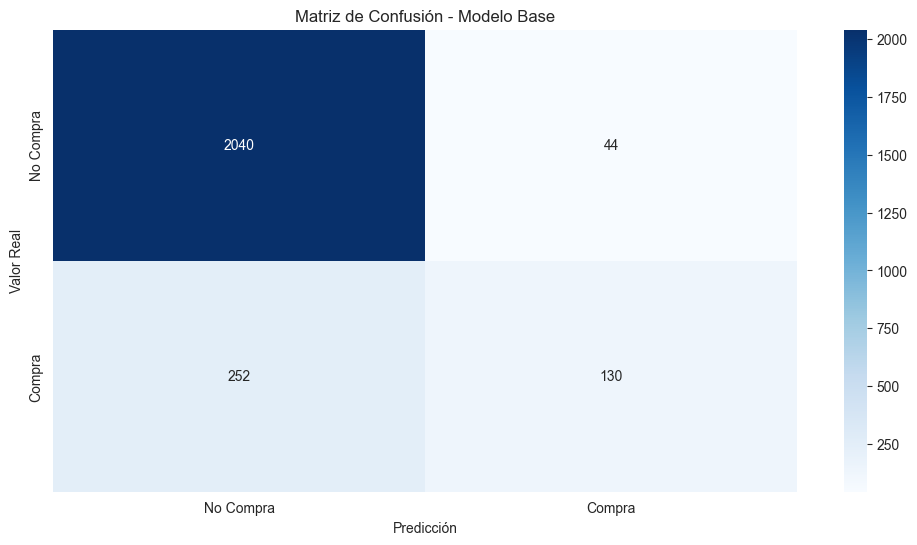


--- Reporte de Clasificación - Modelo Base ---
              precision    recall  f1-score   support

   No Compra       0.89      0.98      0.93      2084
      Compra       0.75      0.34      0.47       382

    accuracy                           0.88      2466
   macro avg       0.82      0.66      0.70      2466
weighted avg       0.87      0.88      0.86      2466



In [36]:
# Realizar predicciones

# Calcular Accuracy

# Mostrar Matriz de Confusión

# Mostrar reporte de clasificación completo



##### **Pregunta Conceptual 1 🧠**

**Pregunta:** "Si 'ShopSphere' usa este modelo para ofrecer descuentos, un **Falso Positivo** cuesta dinero (un descuento innecesario a alguien que no iba a comprar). Un **Falso Negativo** es una venta perdida (no ofrecer un descuento a alguien que sí hubiera comprado con él). Viendo la matriz de confusión y el reporte, ¿qué métrica (Precision, Recall, F1-Score) crees que equilibra mejor estos dos costes para 'ShopSphere'?"



#### **Tarea 3: Modelo Completo con Regularización**

Ahora usamos todas las características y aplicamos regularización para crear un modelo más robusto.


In [14]:
# Re-identificar columnas numéricas y categóricas del DataFrame completo


# Crear el ColumnTransformer


# --- Modelo con Regularización L2 (Ridge) ---


# --- Modelo con Regularización L1 (Lasso) ---


# Definir el espacio de búsqueda del hiperparámetro C (inverso de lambda)
# Un valor pequeño de C significa una regularización más fuerte.


# Configurar GridSearchCV para encontrar el mejor modelo basado en F1-Score


# Entrenar los modelos




Entrenando modelo Ridge (L2)...
Entrenando modelo Lasso (L1)...

--- Resultados de GridSearchCV ---
Mejor F1-Score para Ridge (L2): 0.5105 con C=3.7276
Mejor F1-Score para Lasso (L1): 0.5105 con C=5.4287



##### **Punto de conexión teórico: Interpretando Lasso**

Lasso puede hacer selección de características. Veamos qué variables consideró más importantes.


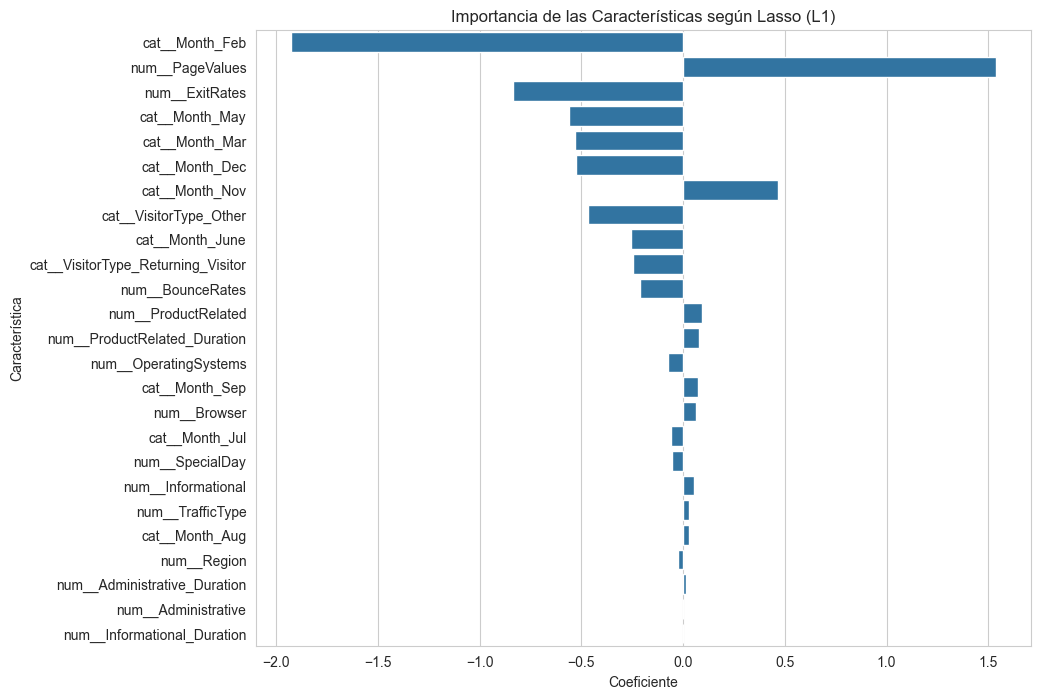

In [38]:
# Extraer los coeficientes del mejor modelo Lasso


# Crear un DataFrame para visualizar la importancia



##### **Pregunta 2 🧠**

**Pregunta:** Al observar los coeficientes de Lasso, vemos que algunas características tienen un coeficiente de cero. ¿Por qué es esto útil en un entorno de producción, más allá de la simple predicción?



#### **Tarea 1: Validación Cruzada Final**

Elegimos el modelo Lasso como nuestro campeón (generalmente L1 es preferido por su capacidad de selección de características si el rendimiento es similar a L2) y realizamos una validación cruzada final para confirmar su rendimiento.


In [39]:
# Usamos el mejor estimador encontrado por GridSearchCV


# Realizamos una validación cruzada de 5 folds sobre los datos de entrenamiento



--- Validación Cruzada Final del Modelo Campeón (Lasso) ---
F1-Score promedio (CV): 0.5105 (+/- 0.0260)
ROC AUC promedio (CV): 0.8974 (+/- 0.0107)


##### **Pregunta 3 🧠**

**Pregunta:** "¿Por qué la puntuación media de la validación cruzada es una estimación más **honesta** del rendimiento del modelo en datos futuros que la que obtuvimos en una sola división de `train_test_split` al principio?"


#### **Tarea 2: Recomendación Final**

Evaluamos el modelo campeón en el conjunto de prueba (`X_test`) que hemos mantenido separado durante todo el proceso.


--- Evaluación Final en el Conjunto de Prueba ---
              precision    recall  f1-score   support

   No Compra       0.89      0.98      0.93      2084
      Compra       0.74      0.36      0.48       382

    accuracy                           0.88      2466
   macro avg       0.82      0.67      0.71      2466
weighted avg       0.87      0.88      0.86      2466



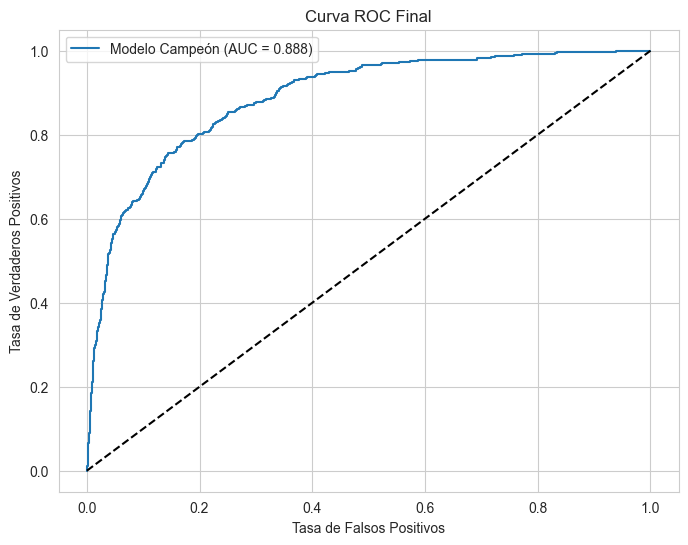

In [40]:
# Realizar predicciones finales en el conjunto de prueba


print("\n--- Evaluación Final en el Conjunto de Prueba ---")

# Curva ROC Final



##### **Recomendación para "ShopSphere"**



